# Factors Impacting Trip Duration and Bike Usage in the Ford Go Bike System
## by Edem Doe Honu

## Investigation Overview
> For my explanatory analysis, my main focus is to present the impact age of bikers have on the trend of the trip duration among users types.

>Specifically, I will explore the trend of the trip duration across the user ages by the user type(customer, subscriber), gender type(male, female and other genders) and, the bike for all user membership. 

> In my presentation, I will initially explain the trend/distribution of trip duration according to their frequencies.

> I will then show the correlation between the main features and trip duration and how the correlation can impact trip duration or even help predict trip duration for a particular user type.

 



## Dataset Overview

> The dataset used for the analysis includes information about individual trips made in a bike-sharing system covering the greater San Francisco Bay area. The main features/ variables in the dataset used for data analysis included Member gender,
Ages of the bikers, User types (Customer/Subscriber), Duration of the trips and Bike Share Program membership. User observations of above 180,000 were explored for analysis and visualization.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_bike = pd.read_csv('fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

> What is the distribution of the trip duration? To begin our explanatory analysis on the user characteristic's impact on trip duration, we explore the distribution of the trip duration first in the data set.



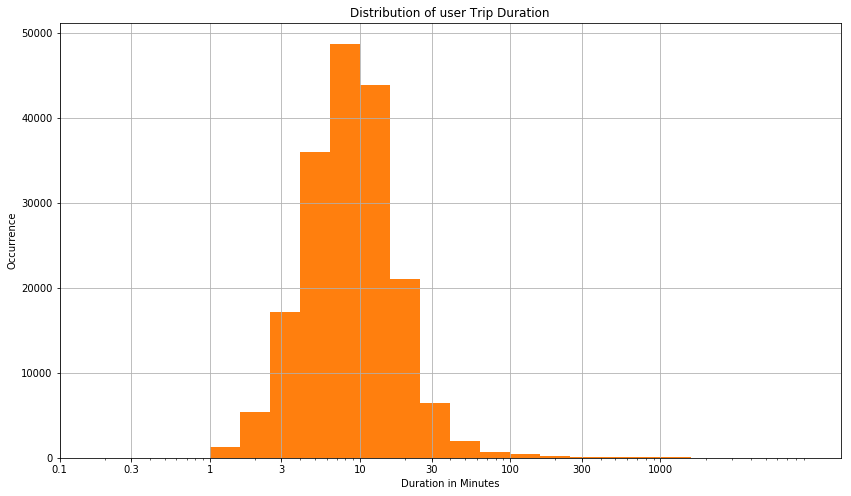

In [3]:
# Coverting trip duration from seconds to minutes
ford_bike['duration_min'] = ford_bike['duration_sec'] / 60
#ford_bike.drop('duration_sec' , axis = 1 , inplace = True)

# Enhancing the figure for better visualization
plt.figure(figsize=[14, 8])
# Get the ticks for bins between [0 - maximum weight]
bins = 10**np.arange(0 , 4+0.2, 0.2)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Converting ticks into string values to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

color = sb.color_palette()[1]
plt.hist(data = ford_bike , x = 'duration_min', color= color, bins = bins);


# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')   
plt.title('Distribution of user Trip Duration')
plt.xlabel('Duration in Minutes')
plt.ylabel('Occurrence')

# Apply x-ticks
plt.xticks(ticks,labels);

plt.grid()
plt.show()

Clearly, it can be observed and interpreted that most of the user trips are short-duration trips around 10 minutes and fairly below an hour. As shown by the visualization, the zenith of trip duration is around 6-10 mins. It could be seen also that few user trips id recorded for 1-2 mins on the lower limit and few user trips are recorded for more than an hour on the upper limit.

## Age of Bikers vrs Trip Duration Distribution

> What is the impact of ages of users on the trip durations recorded? In this distribution, I assessed the correlation between the age of the bikers and trip duration in minutes. This is to observe if there is a significant impact of the ages on the trip duration.

Text(0,0.5,'Trip Duration in Minutes')

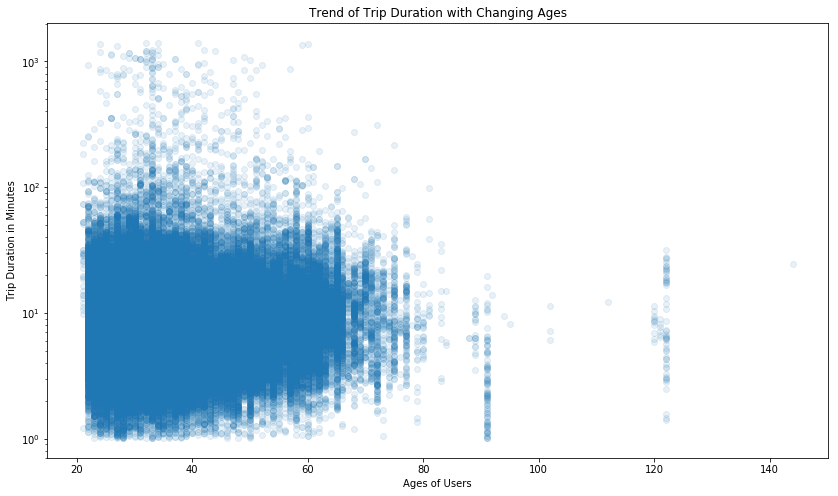

In [4]:
# Calculating the ages of the users and cureating a column age_bikers.
age_bikers = []
ages =  2022- ford_bike.member_birth_year
for age in ages:
    age_bikers.append(age)

ford_bike['age_bikers'] = age_bikers

# Exploring the trip duration over changes in ages of users.
plt.figure(figsize=[14, 8])# Enhancing the figure for better visualization
plt.scatter(data = ford_bike, x= 'age_bikers', y = 'duration_min' , alpha = 0.1 )
plt.title('Trend of Trip Duration with Changing Ages')
plt.yscale('log')
plt.xlabel('Ages of Users')
plt.ylabel('Trip Duration in Minutes')

From the exploration above, it can be observed that the duration of trips made by users were highly concentrated for users with ages 20 to 40 years and losing the concentration approaching 60 years.The concentration diminishes after 60 years with some latter ages recording almost no trip durations at all.
This categorically depicts that the trip duration range is narrowing as the user age increases and hence can be concluded that ages of the users can have an effect on the trip duration recorded.

## User age vrs trip duration by gender type

What is the impact of the user gender types on the trip duration across user ages? In the visualizations below, I attempt to explore the correlation between the gender types and trip duration in minutes across the user ages. Based on this communication, can the gender type be used to predict the trip duration for a particular user?


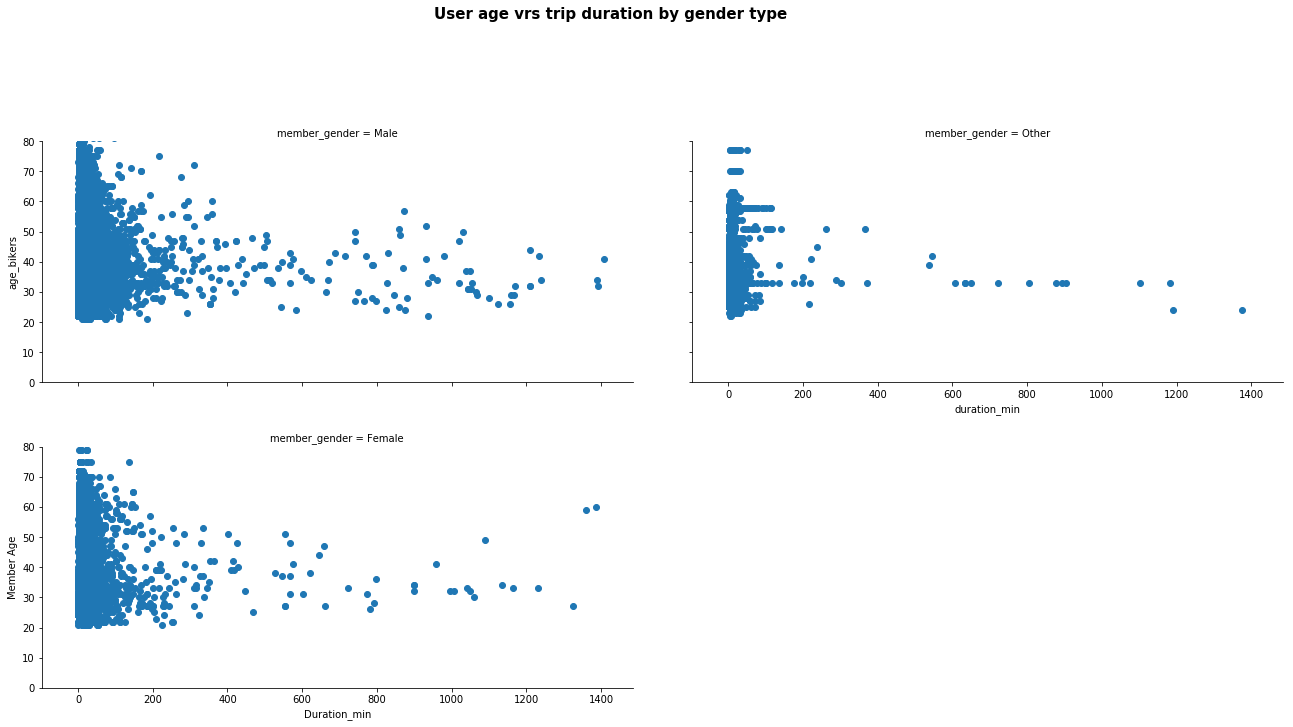

In [7]:
plt.figure(figsize=[14, 8])
# Filling missing gender entries randomly
ford_bike["member_gender"] = ford_bike["member_gender"].fillna(np.random.choice(["Male","Female"]))
# Faceting plot to explore the distribution of trip duration among userr ages by gender type
g = sb.FacetGrid(data = ford_bike, col = 'member_gender', col_wrap = 2, ylim = [0, 80])
g.map(plt.scatter, 'duration_min', 'age_bikers')
g.fig.set_size_inches(20, 9)
g.fig.suptitle('User age vrs trip duration by gender type', y=1.15, fontsize=15, fontweight='bold');
plt.xlabel('Duration_min')
plt.ylabel('Member Age')
plt.show()

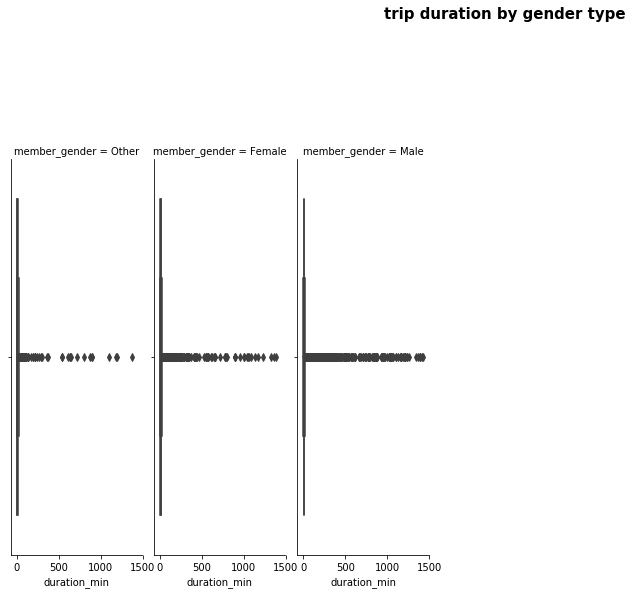

In [8]:
# Code to plot boxplot
plt.figure(figsize=[10,5])
plot_gender_duration = ford_bike[['member_gender', 'duration_min']].groupby(['member_gender']).mean()
# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = plot_gender_duration.sort_values(['duration_min'], ascending = False).index
# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = ford_bike, col = 'member_gender', col_wrap = 7, col_order = group_order)
#g.map(sb.violinplot,'duration_min')- An alternative code to plot a violin plot
g.map(sb.boxplot,'duration_min')
g.fig.set_size_inches(14, 8)
g.fig.suptitle('trip duration by gender type', y=1.15, fontsize=15, fontweight='bold');

From the first visualization above, making comparative analysis of the three gender types plots in respect to trip duration range across ages of the riders, it can be seen that there is a high concentration of trip duration recorded between the ages of 20 and 50 for both male and female genders.  A slight reduction in trip duration concentration can however be observed moving from the male to the female gender.Lastly, the lowest concentrattion of trip duration was recorded in the plot depicting other genders between the ages of 20 and 50.

Concluding, for user ages ranging from 20 years to approximately 60 years, the male and female users exhibited higher trip durations than the other gender types which shows the affinity of the male gender and female gender to use the bike share service more.

The second plot virtually depicts the same findings where one can see a high trip duration concentration between 0 and 500 for male and female genders.
One can therefore predict a user having such high trip duration records as a either a male or a female.

### Trip duration vrs user ages by the user types

How is the trip duration impacted across the user ages based on the user types? In my next exploration, I try to find out how the user types across the ages of the users could have an effect on the trip duration recordings.

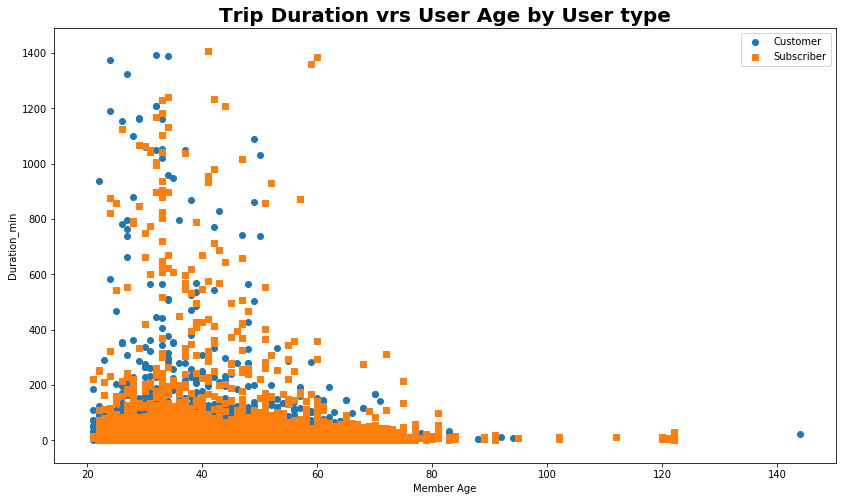

In [9]:
# Setting plot figure size for enhanced visaulization
plt.figure(figsize=[14, 8])
usertype_mark = [['Customer', 'o'],['Subscriber', 's']]

for user_type, marker in usertype_mark:
    df_usertype = ford_bike[ford_bike['user_type'] == user_type]
# Code to plot scatter chart to explore trip duration distribution among user ages by user types
    plt.scatter(df_usertype['age_bikers'], df_usertype['duration_min'], marker = marker, alpha= 1)
plt.legend(['Customer','Subscriber'])
plt.title('Trip Duration vrs User Age by User type' , fontsize=20, fontweight='semibold')
plt.xlabel('Member Age')
plt.ylabel('Duration_min')
plt.show() 

As noticed from the visualization, the distribution for user types (both suscribers and customers) ranging from 20 years to 60 years takes the same trend. However, it can be observed that the distribution of subscriber users extends significantly over 60 to highers ages. 

This shows the tendency of users above 60 years to subscribe to use the bike share service rather than use it casually like the customers.

## Trip duration vrs User Age by Bike Share For All Membership

How is the trip duration impacted across the user ages based on the whether a user is enrolled in th bike share program or not?  In the last slide, I attempt to explore the distribution trip duration across user ages for user membership status in the bike share program. Can enrollment in the bike share program have an impact on how the trip duration is distributed among users.




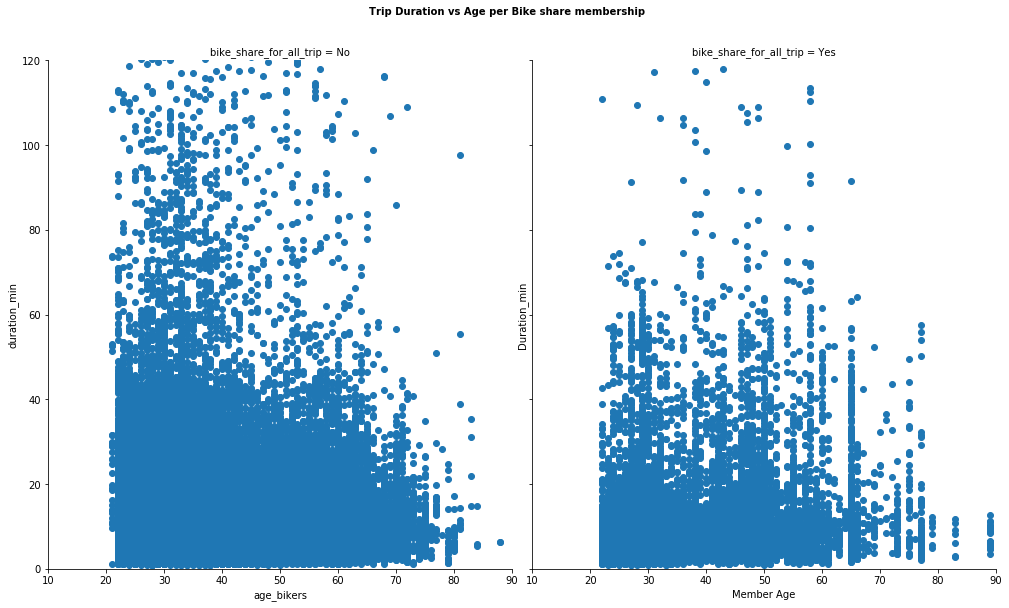

In [10]:
# Code  to plot scatter chart to explore trip duration distribution among user ages by bike share membership
# usind the facet approach
plt.figure(figsize=[20,9])
bike_share = sb.FacetGrid(data = ford_bike, col = 'bike_share_for_all_trip', col_wrap = 2,size = 8, xlim = [10, 90], ylim = [0, 120])
bike_share.map(plt.scatter, 'age_bikers', 'duration_min', alpha= 1) 
bike_share.fig.set_size_inches(14, 8)
plt.xlabel('Member Age')
plt.ylabel('Duration_min')
bike_share.fig.suptitle('Trip Duration vs Age per Bike share membership', y= 1.05, fontweight='bold',fontsize= 10);
plt.show()
 

Lastly, it can be observed that there is a high trip duration concentration for periods between 20 and 60 mins for users not enrolled in the bike share program for ages ranging from 20 to 60 years. The concentration reduces after 60 years approaching higher ages. The distribution trend is quite the opposite when one observes the members enrolled in the program recording a less concentrated trip duration distribution for similar age range.

Concluding, for user ages ranging from 20 years to approximately 60 years, the users who did not enroll in the bike share program exhibited higher trip duration concentration than members which shows the affinity of the non-members to use the bike share service more.

# Thank You!

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert FordGo_Bike_slide_deck_template_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook FordGo_Bike_slide_deck_template_2.ipynb to slides
[NbConvertApp] Writing 676288 bytes to FordGo_Bike_slide_deck_template_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/FordGo_Bike_slide_deck_template_2.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-op